In [1]:
from littlefish.core import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_5"
min_generation = 58
max_generation = 100

population_size = 1000
turnover_rate = 0.8

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000058, 1 / 43 ...
reading generation_0000059, 2 / 43 ...
reading generation_0000060, 3 / 43 ...
reading generation_0000061, 4 / 43 ...
reading generation_0000062, 5 / 43 ...
reading generation_0000063, 6 / 43 ...
reading generation_0000064, 7 / 43 ...
reading generation_0000065, 8 / 43 ...
reading generation_0000066, 9 / 43 ...
reading generation_0000067, 10 / 43 ...
reading generation_0000068, 11 / 43 ...
reading generation_0000069, 12 / 43 ...
reading generation_0000070, 13 / 43 ...
reading generation_0000071, 14 / 43 ...
reading generation_0000072, 15 / 43 ...
reading generation_0000073, 16 / 43 ...
reading generation_0000074, 17 / 43 ...
reading generation_0000075, 18 / 43 ...
reading generation_0000076, 19 / 43 ...
reading generation_0000077, 20 / 43 ...
reading generation_0000078, 21 / 43 ...
reading generation_0000079, 22 / 43 ...
reading generation_0000080, 23 / 43 ...
reading generation_0000081, 24 / 43 ...
reading generation_0000082, 25 / 43 ...
reading g

In [4]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
16870,74,b'fish_241111_00_54_11.611371',12,False
20299,78,b'fish_241111_01_56_52.254532',14,False
29137,87,b'fish_241111_04_01_37.884079',14,True
2771,60,b'fish_241110_21_09_35.459490',15,False
13220,71,b'fish_241111_00_03_22.422045',15,False
...,...,...,...,...
569,58,b'fish_241110_20_36_05.524857',9127,False
15328,73,b'fish_241111_00_37_56.499394',9200,False
31121,89,b'fish_241111_04_29_08.187738',9458,True
33648,91,b'fish_241111_05_18_12.442626',10325,False


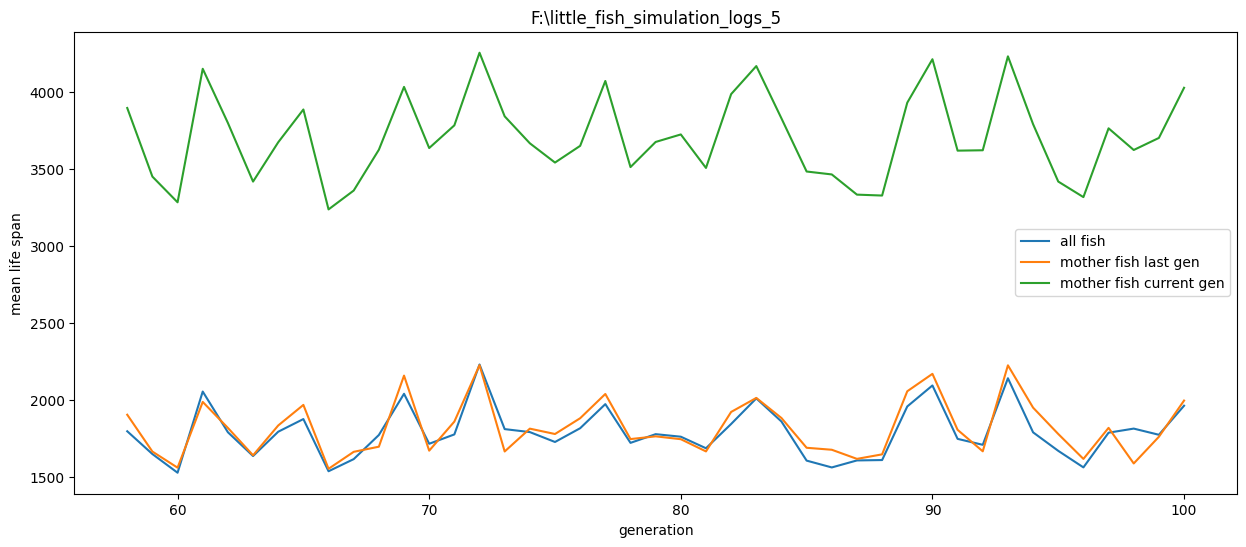

In [5]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

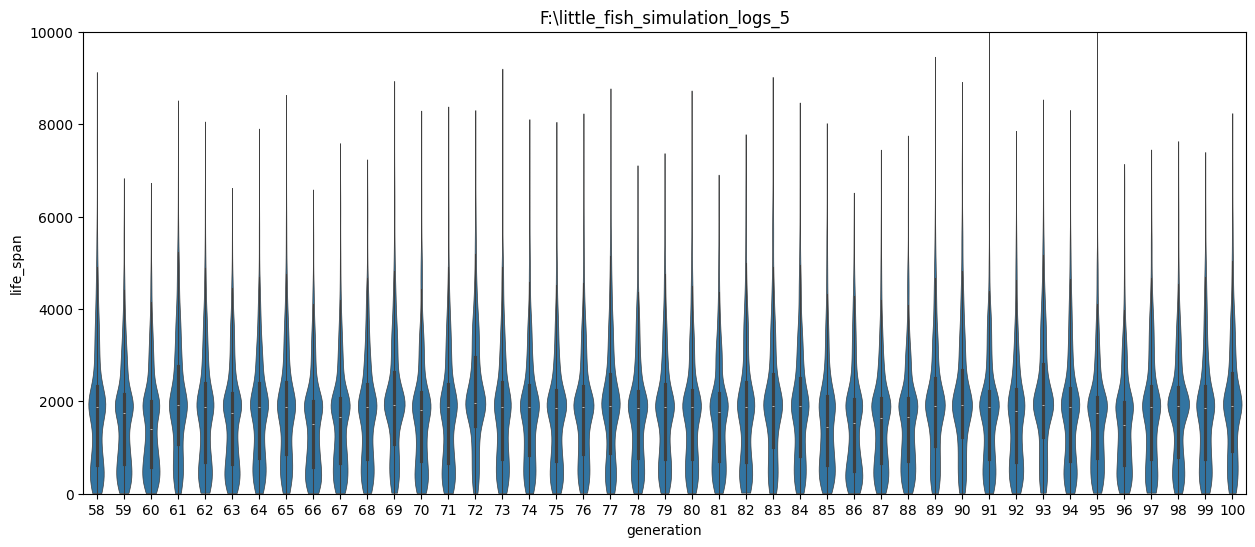

In [6]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

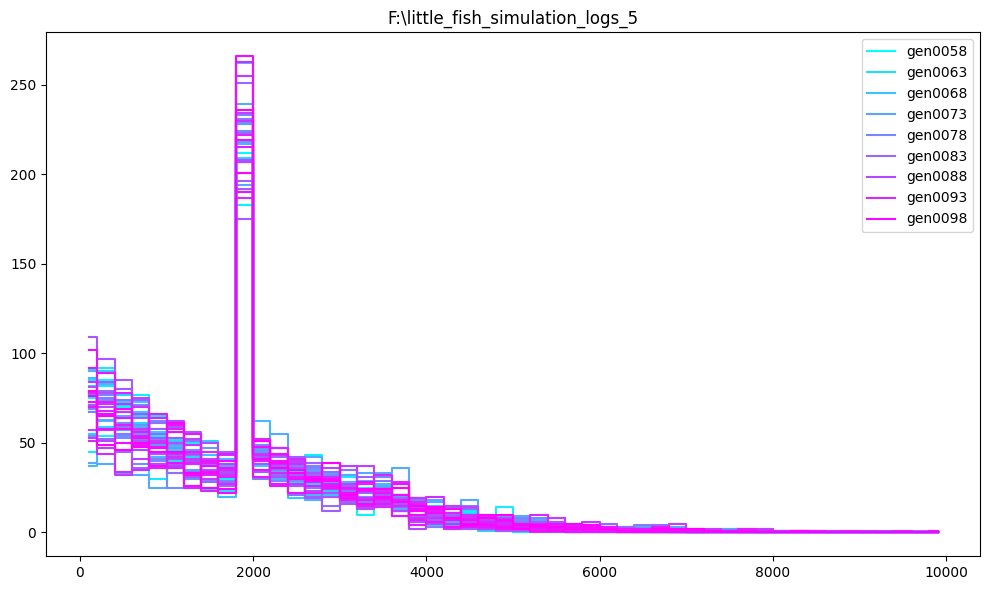

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()